In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_df(key):
    return df_responses.iloc[df_orgs_private_grouped.groups[key]]
    
def get_model_group_indices(group):
    return df_model.groupby(['dim','lvl']).groups[group[0],int(group[1])]

def get_levels(df_responses_group,dim):
    df_dim = pd.DataFrame()
    for lvl in dict_mod[dim]:
        df_dim[lvl] = df_responses_group[dict_mod[dim][lvl]].mean(axis=1)

    df_dim[df_dim.apply(lambda x: x >=5)]=0
    df_dim['max']=df_dim.apply(lambda row: next((i for i, x in enumerate(row) if x), None), axis=1)

    df_dim[df_dim.isna()]=0
    df_dim['partial']=df_dim.apply(lambda row: 0.25*(-1+row[int(row[['max']])+1]), axis=1)
    df_dim['level']= df_dim.apply(lambda row: row['max']+row['partial']+1, axis=1)

    df_dim['level'][df_dim['level']==0.75]=5.0
    df_dim= df_dim[['level']]
    return df_dim

def analyze(df_responses, dimensions=None):
    df = df_responses
    if not dimensions:
        dimensions=['customer','content','platform','analytics','ecosystem','culture'] 

    for dim in dimensions:
        df[dim]=get_levels(df_responses, dim)
    df = df[dimensions]
    return df

def rank_plot(df):
    fig,ax = plt.subplots(len(df.keys()), figsize=(10,50))
    fig.subplots_adjust(hspace=0.5)

    for i,key in enumerate(list(df.keys())):
        ax[i].bar(df[key]['name'].values, df[key]['overall'].values)
        ax[i].set_title('{}'.format(str(key)))
        ax[i].set_xlabel('x_label')

        

# Model

In [3]:
df_model = pd.read_csv('data/models/model.csv')
df_model.head()

,question_text,dim,lvl,question_id
0,Q1 text?,customer,1,1
1,Q2 text?,customer,1,2
2,Q3 text?,customer,1,3
3,Q4 text?,customer,1,4
4,Q5 text?,customer,1,5


In [5]:
dimensions=['customer','content','platform','analytics','ecosystem','culture'] 
levels = [1,2,3,4,]

In [6]:
dim_indices = {dim:np.array(df_model.groupby(['dim']).groups[dim])+1 for dim in dimensions}
lvl_indices = {lvl:np.array(df_model.groupby(['lvl']).groups[lvl])+1 for lvl in levels}

model_groups = np.array([[(dim,lvl) for lvl in levels] for dim in dimensions]).reshape(-1,2)
model_group_indices = np.array(list(map(get_model_group_indices,model_groups)))+1


In [8]:
dict_mod = dict()
for i,dim in enumerate(dimensions):
    dict_lvl = dict()
    for k,lvl in enumerate(levels):

        dict_lvl[lvl]=model_group_indices[i*len(levels)+k]
        dict_mod[dim] = dict_lvl
        

In [9]:
dict_mod

{'customer': {1: array([1, 2, 3, 4, 5]),
  2: array([ 6,  7,  8,  9, 10]),
  3: array([11, 12, 13, 14, 15]),
  4: array([16, 17, 18, 19, 20])},
 'content': {1: array([21, 22, 23, 24, 25]),
  2: array([26, 27, 28, 29, 30]),
  3: array([31, 32, 33, 34, 35]),
  4: array([36, 37, 38, 39, 40])},
 'platform': {1: array([41, 42, 43, 44, 45]),
  2: array([46, 47, 48, 49, 50]),
  3: array([51, 52, 53, 54, 55]),
  4: array([56, 57, 58, 59, 60])},
 'analytics': {1: array([81, 82, 83, 84, 85]),
  2: array([86, 87, 88, 89, 90]),
  3: array([91, 92, 93, 94, 95]),
  4: array([ 96,  97,  98,  99, 100])},
 'ecosystem': {1: array([61, 62, 63, 64, 65]),
  2: array([66, 67, 68, 69, 70]),
  3: array([71, 72, 73, 74, 75]),
  4: array([76, 77, 78, 79, 80])},
 'culture': {1: array([101, 102, 103, 104, 105]),
  2: array([106, 107, 108, 109, 110]),
  3: array([111, 112, 113, 114, 115]),
  4: array([116, 117, 118, 119, 120])}}

# Organizations

In [10]:
df_orgs = pd.read_csv('data/organizations/organization_table.csv')
df_orgs.head()

,name,is_public,industry
0,comp_0,False,card
1,comp_1,False,insurer
2,comp_2,False,card
3,comp_3,False,insurer
4,comp_4,False,holdings


In [11]:
df_orgs_grouped = df_orgs.groupby(['is_public','industry']).groups

In [12]:
org_keys = list(df_orgs.groupby(['is_public','industry']).groups.keys())

In [13]:
df_orgs_grouped[org_keys[0]]

Int64Index([6, 7, 8, 9, 10, 16, 18, 27, 48, 60, 64, 69, 70, 72, 78, 85, 105,
            110, 145],
           dtype='int64')

# Responses

In [14]:
df_responses = pd.read_excel('data/responses/responses.xlsx', header = None)
df_responses.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,comp_0,7,6,6,5,4,6,5,5,5,...,5,7,3,5,4,5,4,5,4,5
1,comp_1,2,2,2,1,4,5,3,3,2,...,6,2,2,4,2,4,4,2,2,2
2,comp_2,7,6,6,6,6,6,6,4,5,...,5,7,2,4,4,4,5,4,4,4
3,comp_3,5,2,5,3,5,5,2,2,2,...,5,7,7,3,2,3,2,2,4,4
4,comp_4,6,4,5,6,7,5,2,2,6,...,4,7,7,4,2,1,4,3,1,1


# 조직 개수

In [16]:
df_orgs.groupby(['is_public','industry']).agg('count')

name
is_public industry            
False     bank              19
          card              13
          equity            19
          holdings           7
          insurer           26
          other             10
True      communications     8
          other             12
          public_finance    18
          safety            10
          transportation    13
          welfare            9

# Analysis

In [17]:
df_analyzed = analyze(df_responses)
df_analyzed.head()

,customer,content,platform,analytics,ecosystem,culture
0,3.80,5.00,5.00,3.45,4.90,2.75
1,1.30,2.50,1.25,1.25,1.85,1.70
2,3.90,2.95,1.90,1.75,1.75,2.65
3,1.75,1.60,1.65,1.60,1.45,2.45
4,2.75,3.75,1.80,1.60,1.55,2.55


In [26]:
df_analyzed['overall']=df_analyzed.mean(axis=1)

/Users/mathmind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_analyzed.head()

,customer,content,platform,analytics,ecosystem,culture,overall
0,3.80,5.00,5.00,3.45,4.90,2.75,4.150000
1,1.30,2.50,1.25,1.25,1.85,1.70,1.641667
2,3.90,2.95,1.90,1.75,1.75,2.65,2.483333
3,1.75,1.60,1.65,1.60,1.45,2.45,1.750000
4,2.75,3.75,1.80,1.60,1.55,2.55,2.333333


In [28]:
df_entire= df_analyzed.join(df_orgs)

In [29]:
df_entire.loc[df_orgs_grouped[org_keys[6]]]

,customer,content,platform,analytics,ecosystem,culture,overall,name,is_public,industry
82,2.90,4.90,4.95,1.90,2.95,5.00,3.766667,comp_82,True,communications
93,1.20,1.10,1.10,3.45,1.10,1.05,1.500000,comp_93,True,communications
95,1.35,3.70,2.85,5.00,1.90,1.75,2.758333,comp_95,True,communications
115,2.45,1.55,1.65,1.60,1.60,1.70,1.758333,comp_115,True,communications
116,1.50,1.35,1.70,1.05,2.40,1.40,1.566667,comp_116,True,communications
117,2.95,2.70,1.65,1.95,1.25,2.70,2.200000,comp_117,True,communications
120,2.85,1.70,1.70,5.00,1.10,2.80,2.525000,comp_120,True,communications
125,2.90,1.80,5.00,1.25,1.90,3.60,2.741667,comp_125,True,communications


In [30]:
ranked_dfs = dict()
for key in org_keys:
    ranked_dfs[key]=df_entire.loc[df_orgs_grouped[key]].sort_values('overall')


In [32]:
ranked_dfs[org_keys[0]]

,customer,content,platform,analytics,ecosystem,culture,overall,name,is_public,industry
105,1.35,2.85,1.25,1.15,1.05,1.60,1.541667,comp_105,False,bank
70,1.75,1.75,1.80,2.35,1.00,1.40,1.675000,comp_70,False,bank
110,1.75,2.85,1.40,1.25,1.25,1.85,1.725000,comp_110,False,bank
72,1.90,1.75,1.35,2.55,1.65,2.75,1.991667,comp_72,False,bank
60,2.70,2.80,1.50,1.15,1.35,2.80,2.050000,comp_60,False,bank
64,2.85,4.95,1.95,2.90,1.85,1.85,2.725000,comp_64,False,bank
85,3.60,4.75,1.85,2.85,1.95,2.60,2.933333,comp_85,False,bank
6,3.80,4.90,1.90,1.85,3.95,2.75,3.191667,comp_6,False,bank
69,3.65,5.00,1.70,2.90,1.90,5.00,3.358333,comp_69,False,bank
78,3.95,3.80,5.00,1.95,2.95,2.95,3.433333,comp_78,False,bank


# Plots

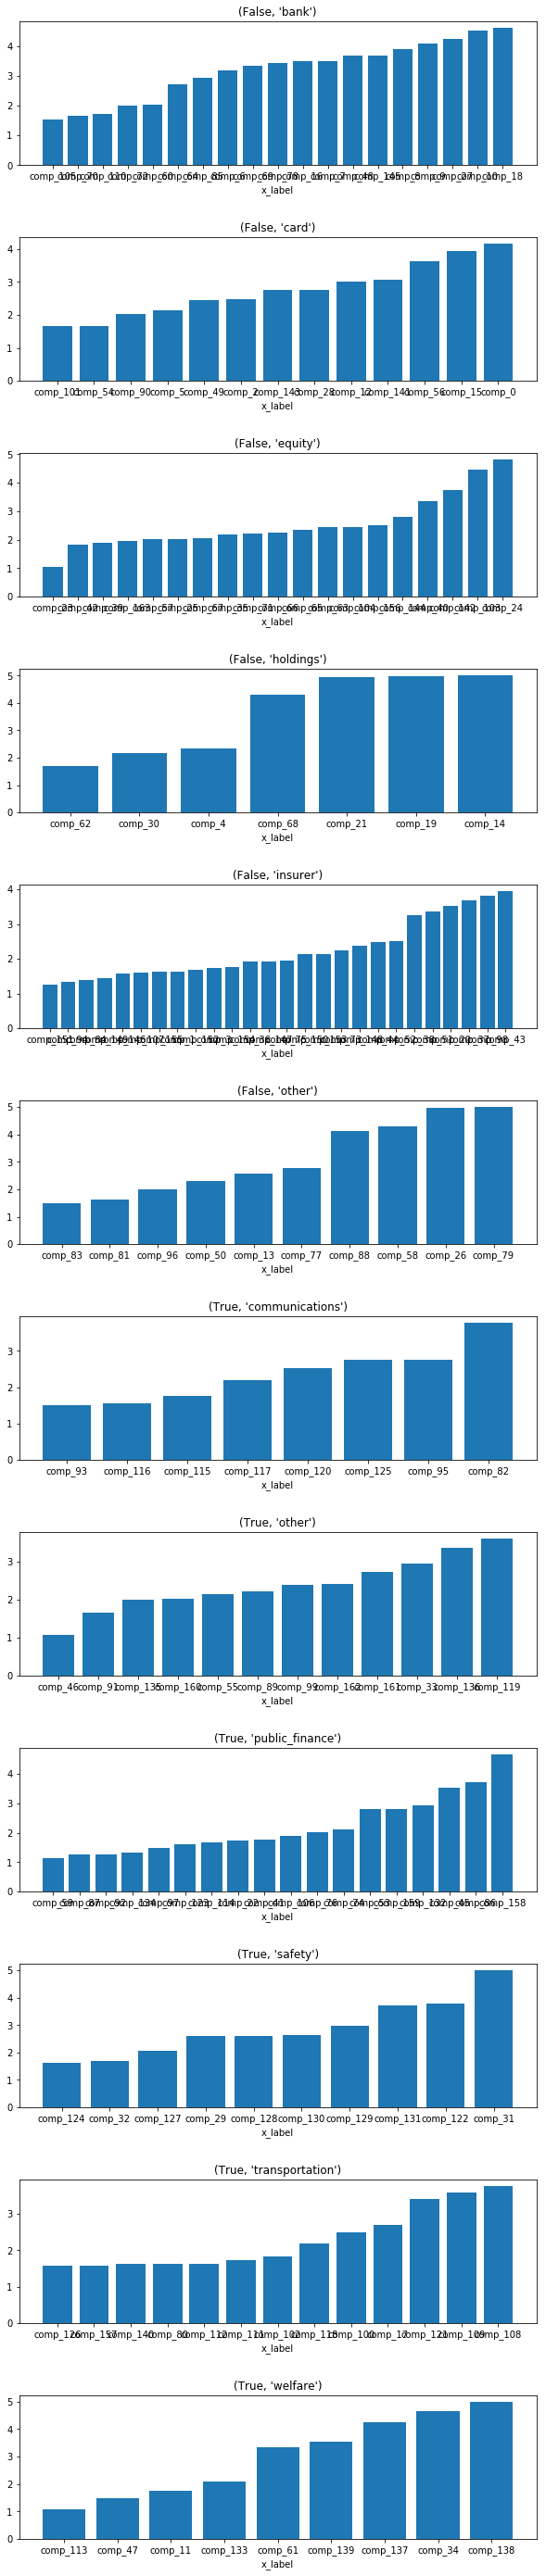

In [33]:
rank_plot(ranked_dfs)